In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

Job Title  \
0                              Senior Data Scientist   
1  Senior Data Scientist // Scientifique des donn...   
2                      Sr. Big Data Engineer(Python)   
3                             Product Data Scientist   
4                                     Data Scientist   

                  Salary Estimate  \
0  CA$58k-CA$90k (Glassdoor Est.)   
1  CA$58k-CA$90k (Glassdoor Est.)   
2  CA$58k-CA$90k (Glassdoor Est.)   
3  CA$58k-CA$90k (Glassdoor Est.)   
4  CA$58k-CA$90k (Glassdoor Est.)   

                                     Job Description  Rating  \
0  What is the opportunity?\n\nAs a Senior Data S...     4.0   
1  Reporting to the Analytics Manager, the Senior...     4.1   
2  About Altran: *\nAltran is the undisputed worl...     3.6   
3  Coffee Meets Bagel\nCoffee Meets Bagel's missi...     4.5   
4  About Assurance\nAt Assurance we are disruptin...     3.4   

                   Company Name   Location  Headquarters  \
0     Royal Bank of Canada\n4.0    Toronto            -1   
1  Ssense Presents Limited\n4.1   Montreal            -1   
2             Altrad Group\n3.6  Vancouver            -1   
3       Coffee Meets Bagel\n4.5    Toronto            -1   
4       ASSURANCE IQ, Inc.\n3.4    Toronto            -1   

                     Size  Founded  Type of ownership  ... avg_salary  \
0        10000+ Employees     1869   Company - Public  ...       74.0   
1   501 to 1000 Employees     2003  Company - Private  ...       74.0   
2  1001 to 5000 Employees       -1  Company - Private  ...       74.0   
3     51 to 200 Employees     2012  Company - Private  ...       74.0   
4     51 to 200 Employees     2016  Company - Private  ...       74.0   

                 company_txt  job_state  same_state  age  python  r studio  \
0     Royal Bank of Canada\n    Toronto           0  151       1         0   
1  Ssense Presents Limited\n   Montreal           0   17       1         0   
2             Altrad Group\n  Vancouver           0   -1       1         0   
3       Coffee Meets Bagel\n    Toronto           0    8       1         0   
4       ASSURANCE IQ, Inc.\n    Toronto           0    4       1         0   

   spark  excel aws  
0      1      0   0  
1      1      1   0  
2      1      0   0  
3      0      0   0  
4      0      1   1  

[5 rows x 28 columns]

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r studio',
       'spark', 'excel', 'aws'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

na                257
data engineer     228
analyst           127
data scientist    116
mle                75
manager            41
director            6
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        514
senior    335
jr          1
Name: seniority, dtype: int64

In [10]:
##  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [ ]:
##  Competitor count
#df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
## hourly wage to annual 
df['min_salary'] = df.apply(lambda x: x.min_salary if x.hourly == 1 else x.min_salary, axis =1)
df['min_salary']

0      58
1      58
2      58
3      58
4      58
       ..
845    67
846    67
847    67
848    67
849    67
Name: min_salary, Length: 850, dtype: int64

In [15]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [17]:
#df[df.hourly ==1][['hourly','min_salary','max_salary']]
df[['hourly','min_salary','max_salary']]

hourly  min_salary  max_salary
0         0          58          90
1         0          58          90
2         0          58          90
3         0          58          90
4         0          58          90
..      ...         ...         ...
845       0          67          82
846       0          67          82
847       0          67          82
848       0          67          82
849       0          67          82

[850 rows x 3 columns]

In [19]:
#remove new line from job title
df.company_txt

0                Royal Bank of Canada\n
1             Ssense Presents Limited\n
2                        Altrad Group\n
3                  Coffee Meets Bagel\n
4                  ASSURANCE IQ, Inc.\n
                     ...               
845                        APPTOZA INC.
846             CoreHR Solutions Inc.\n
847    Manulife Financial Corporation\n
848               PRA Health Sciences\n
849               PRA Health Sciences\n
Name: company_txt, Length: 850, dtype: object

In [21]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [22]:
df.company_txt

0                Royal Bank of Canada
1             Ssense Presents Limited
2                        Altrad Group
3                  Coffee Meets Bagel
4                  ASSURANCE IQ, Inc.
                    ...              
845                      APPTOZA INC.
846             CoreHR Solutions Inc.
847    Manulife Financial Corporation
848               PRA Health Sciences
849               PRA Health Sciences
Name: company_txt, Length: 850, dtype: object

In [23]:
df.describe()

Rating  Headquarters      Founded  Competitors  hourly  \
count  850.000000         850.0   850.000000        850.0   850.0   
mean     2.986353          -1.0  1400.241176         -1.0     0.0   
std      1.885816           0.0   903.252471          0.0     0.0   
min     -1.000000          -1.0    -1.000000         -1.0     0.0   
25%      3.200000          -1.0    -1.000000         -1.0     0.0   
50%      3.700000          -1.0  1982.500000         -1.0     0.0   
75%      4.000000          -1.0  2004.000000         -1.0     0.0   
max      5.000000          -1.0  2020.000000         -1.0     0.0   

       employer_provided  min_salary  max_salary  avg_salary  same_state  \
count              850.0  850.000000  850.000000  850.000000       850.0   
mean                 0.0   63.152941   89.094118   76.123529         0.0   
std                  0.0   15.016682   12.770165   12.232029         0.0   
min                  0.0   29.000000   63.000000   49.000000         0.0   
25%                  0.0   58.000000   82.000000   74.500000         0.0   
50%                  0.0   67.000000   89.000000   74.500000         0.0   
75%                  0.0   72.000000   94.000000   81.500000         0.0   
max                  0.0   87.000000  120.000000   96.500000         0.0   

              age      python    r studio       spark       excel         aws  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean    27.431765    0.585882    0.004706    0.307059    0.504706    0.249412   
std     41.893782    0.492859    0.068478    0.461546    0.500272    0.432927   
min     -1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     -1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     15.000000    1.000000    0.000000    0.000000    1.000000    0.000000   
75%     33.000000    1.000000    0.000000    1.000000    1.000000    0.000000   
max    271.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           desc_len  
count    850.000000  
mean    3989.082353  
std     1847.562516  
min      142.000000  
25%     2801.000000  
50%     3900.000000  
75%     4862.000000  
max    13000.000000

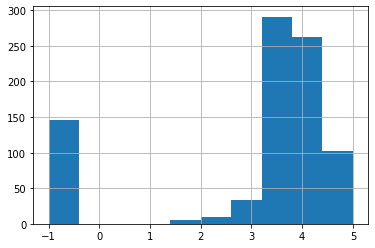

In [24]:
df.Rating.hist()

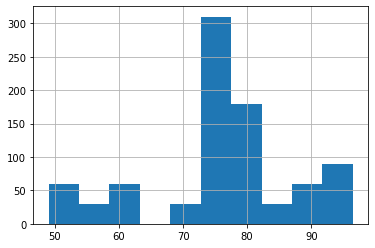

In [25]:
df.avg_salary.hist()

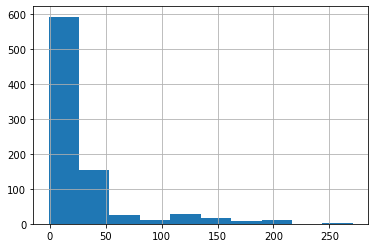

In [26]:
df.age.hist()

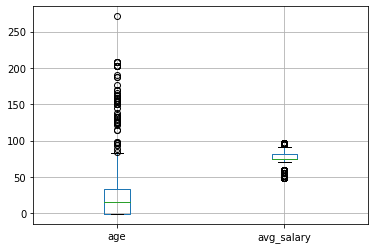

In [31]:
df.boxplot(column= ['age', 'avg_salary'])

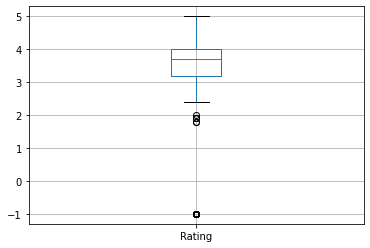

In [32]:
df.boxplot(column= 'Rating')

In [34]:
df[['age', 'avg_salary','Rating']].corr()

age  avg_salary    Rating
age         1.000000    0.052149  0.277917
avg_salary  0.052149    1.000000  0.050609
Rating      0.277917    0.050609  1.000000

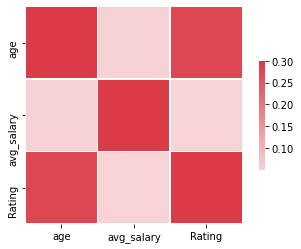

In [36]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python', 'r studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 54


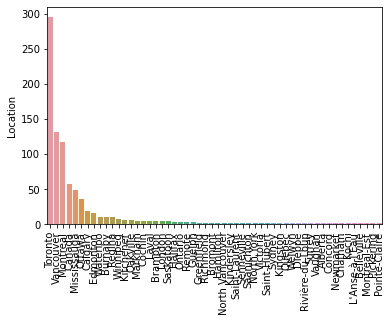

graph for Size: total = 9


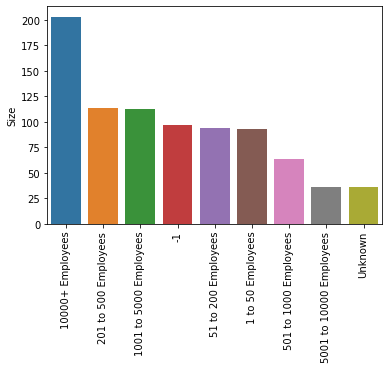

graph for Type of ownership: total = 12


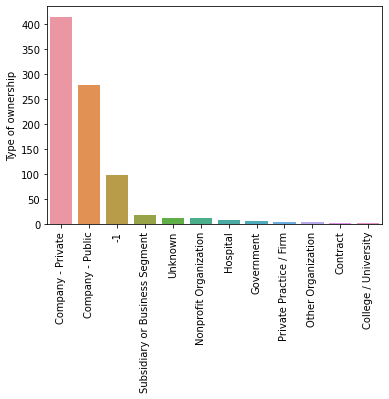

graph for Industry: total = 54


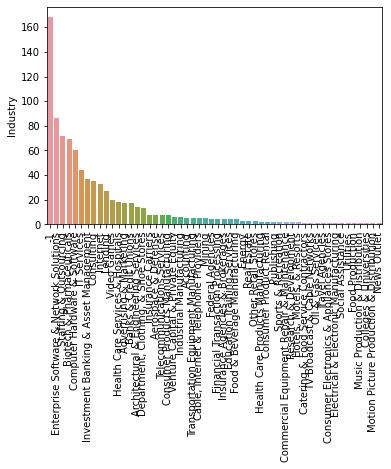

graph for Sector: total = 25


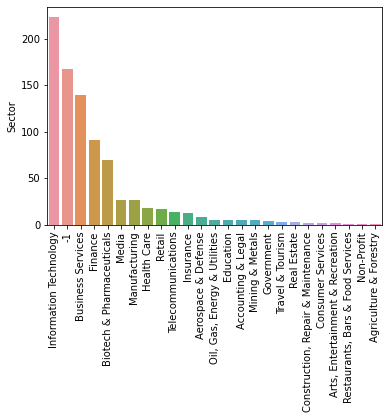

graph for Revenue: total = 14


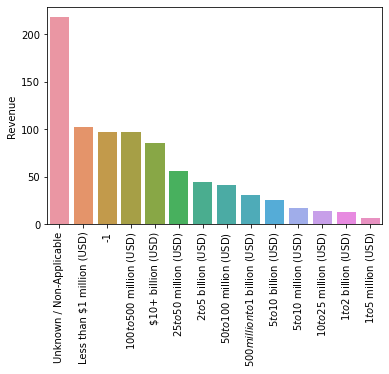

graph for company_txt: total = 353


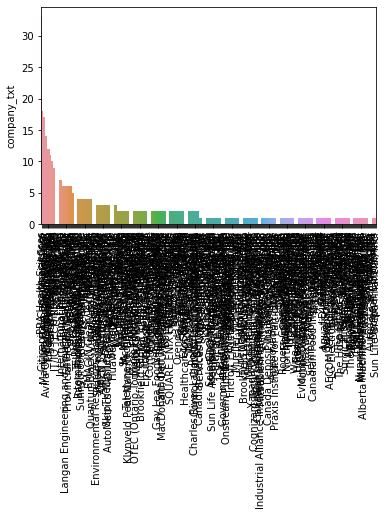

graph for job_state: total = 54


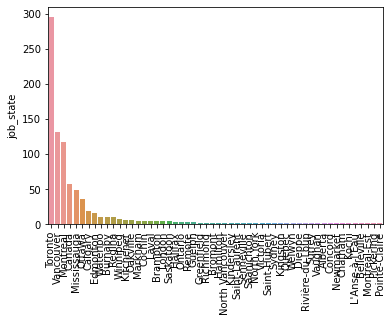

graph for same_state: total = 1


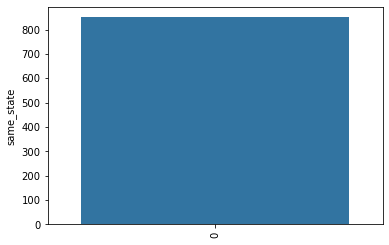

graph for python: total = 2


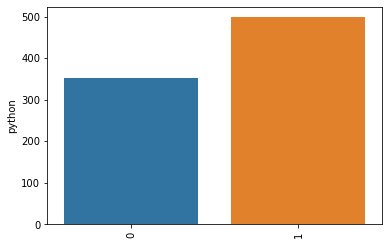

graph for r studio: total = 2


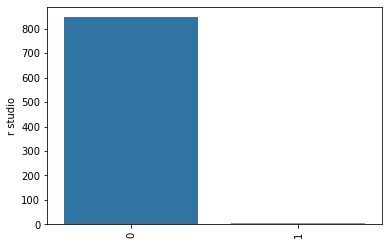

graph for spark: total = 2


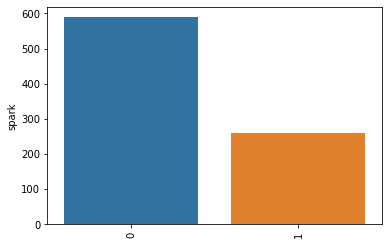

graph for aws: total = 2


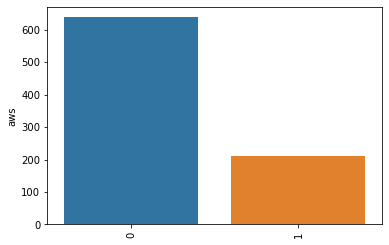

graph for excel: total = 2


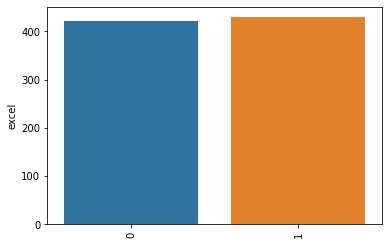

graph for job_simp: total = 7


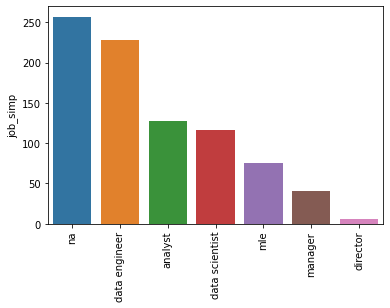

graph for seniority: total = 3


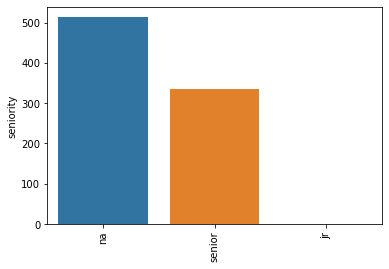

In [43]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


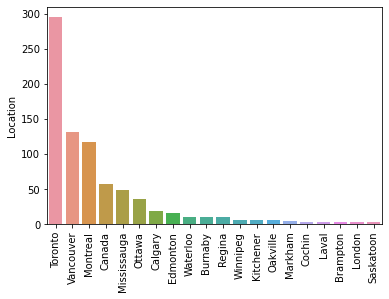

graph for company_txt: total = 20


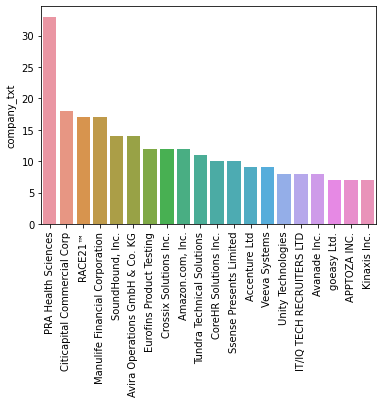

graph for Industry: total = 20


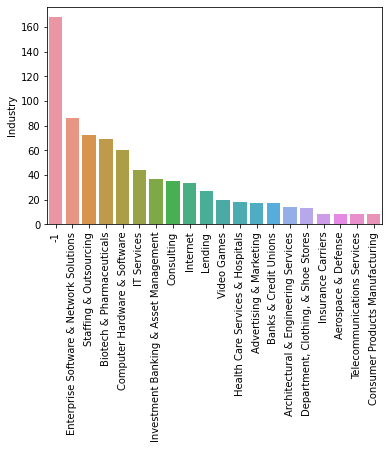

In [44]:
for i in df_cat[['Location','company_txt', 'Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r studio',
       'spark', 'excel', 'aws', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [46]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

avg_salary
job_simp                  
analyst          75.452756
data engineer    76.467105
data scientist   79.375000
director         76.750000
manager          78.182927
mle              77.140000
na               74.042802

In [47]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          80.500000
               na          72.622093
               senior      81.412500
data engineer  na          75.700000
               senior      77.398058
data scientist na          79.590361
               senior      78.833333
director       na          76.875000
               senior      76.500000
manager        na          78.820000
               senior      77.187500
mle            na          77.622222
               senior      76.416667
na             na          72.363014
               senior      76.252252

In [48]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state  job_simp                  
Winnipeg   na               63.166667
           data scientist   80.500000
           data engineer    85.000000
           analyst          80.500000
Welwyn     data scientist   59.000000
...                               ...
Bromont    na               85.000000
Brampton   data engineer    81.500000
           na               73.000000
Belleville analyst          56.000000
Alberta    na               51.500000

[117 rows x 1 columns]

In [49]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [50]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state       job_simp                  
Winnipeg        na                       3
                data scientist           1
                data engineer            2
                analyst                  1
Welwyn          data scientist           1
Waterloo        na                       3
                mle                      2
                data scientist           2
                data engineer            3
Victoria        data scientist           2
Vaughan         analyst                  1
Vancouver       data scientist          20
                analyst                 16
                data engineer           37
                director                 1
                manager                  6
                mle                     15
                na                      37
Toronto         na                      71
                mle                     41
                manager                 19
                director                 3
                data scientist          40
                data engineer           89
                analyst                 32
Sydney          data scientist           2
Surrey          analyst                  1
Senneville      na                       2
Saskatoon       data engineer            1
                analyst                  1
                na                       2
Saint-Laurent   na                       1
                data scientist           1
Saint-Hubert    analyst                  2
Saanichton      na                       2
Rivière-du-Loup analyst                  1
Richmond        na                       2
Remote          mle                      1
                data engineer            2
Regina          data scientist           1
                analyst                  9
Quebec          data scientist           1
Pointe-Claire   data scientist           1
Pickering       data engineer            1
Ottawa          na                       5
                mle                      2
                manager                  5
                data scientist           6
                data engineer            9
                analyst                  9
Ontario         data scientist           1
                data engineer            2
Oakville        na                       3
                director                 1
                data scientist           2
North York      analyst                  2
North Vancouver analyst                  1
                na                       1
Newmarket       data engineer            1
Montréal-Est    analyst                  1
Montreal        na                      31
                mle                      5
                manager                  4
                director                 1
                data scientist          20
                data engineer           32
                analyst                 24
Mississauga     na                      18
                manager                  7
                data scientist           2
                data engineer           12
                analyst                 10
Markham         analyst                  1
                data engineer            1
                na                       3
London          na                       2
                mle                      1
                data engineer            1
Laval           na                       2
                data engineer            2
L'Anse-à-l'Eau  na                       1
Kochi           na                       1
Kitchener       mle                      4
                data engineer            2
Kingston        analyst                  1
Kindersley      na                       2
Hamilton        na                       2
Halifax         data scientist           1
                analyst                  1
                na                       1
Guelph          analyst                  1
                na               

In [51]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

avg_salary
job_state                
Quebec          96.500000
Ontario         86.500000
Saint-Laurent   86.500000
Vancouver       82.250000
Canada          81.666667
Winnipeg        80.500000
Victoria        80.250000
Calgary         80.250000
Oakville        80.250000
Mississauga     80.250000
Toronto         79.312500
Montreal        78.725000
Sydney          78.000000
Concord         78.000000
Pointe-Claire   78.000000
Waterloo        76.000000
Ottawa          75.333333
Regina          74.000000
Halifax         74.000000
Cochin          73.750000
Welwyn          59.000000

In [52]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r studio',
       'spark', 'excel', 'aws', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [53]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [60]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python', 'r studio', 'spark', 'aws', 'excel', 'Type of ownership', 'avg_salary']]

In [61]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.7     91.500000
 3.0     87.200000
 2.5     85.100000
 2.0     79.000000
 3.9     78.646154
 3.5     78.384615
 4.9     78.318182
 3.6     77.806818
 3.7     77.792135
 4.8     77.625000
 4.2     77.467742
 3.4     76.560976
 4.0     76.526316
 1.9     76.500000
 3.2     75.923077
 3.3     75.910256
 2.6     75.666667
 2.9     75.500000
 4.1     75.421875
 3.8     74.922222
 4.3     74.671875
-1.0     74.397260
 4.4     74.357143
 1.8     74.000000
 4.5     73.666667
 5.0     73.166667
 3.1     72.500000
 2.8     72.000000
 4.7     70.785714
 4.6     70.250000
 2.4     66.500000
Industry
                                           avg_salary
Industry                                             
Catering & Food Service Contractors         96.500000
News Outlet                                 96.500000
Hotels, Motels, & Resorts                   86.500000
Food & Beverage Manufacturing               85.750000
Energy                           

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [62]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python                             0    1
Revenue                                  
$1 to $2 billion (USD)             4    9
$1 to $5 million (USD)             4    3
$10 to $25 million (USD)          10    4
$10+ billion (USD)                31   55
$100 to $500 million (USD)        60   37
$2 to $5 billion (USD)            22   23
$25 to $50 million (USD)          17   39
$5 to $10 billion (USD)            7   19
$5 to $10 million (USD)            7   10
$50 to $100 million (USD)         18   23
$500 million to $1 billion (USD)  11   20
-1                                46   51
Less than $1 million (USD)        51   51
Unknown / Non-Applicable          64  154

In [64]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

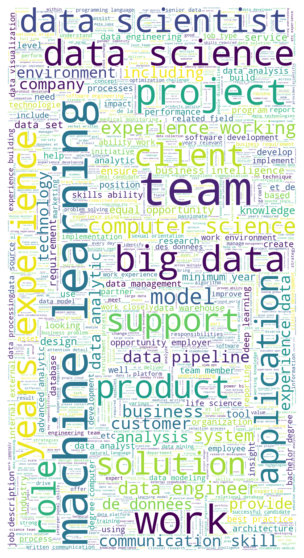

In [66]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()